# Flight Delay

### Summary

__I. Reading and Cleaning__

__II. Exploration__

    1.1 Day of The week Bar Chart
    
    1.2 Distance Histogram
    
    1.3 Histogram of Taxi-Out times
    
    1.4 Carrier Delay and reasons
    
    1.5 Carrier Cancellations and reasons

__III. Machine Learning__

    1.1 Random Forest Classifier
    
    1.2 Gradient Boosting Tree
    
    1.3 Logistic Regression and GridSearch
    
    1.4 MLPClassifier
    
__IV. Cancellation Classification__

____________________
This dataset is composed by the following variables: 

1.	**Year**	2016
2.	**Month**	1-12
3.	**DayofMonth**	1-31
4.	**DayOfWeek**	1 (Monday) - 7 (Sunday)
5.	**DepTime**	actual departure time (local, hhmm)
6.	**CRSDepTime**	scheduled departure time (local, hhmm)
7.	**ArrTime**	actual arrival time (local, hhmm)
8.	**CRSArrTime**	scheduled arrival time (local, hhmm)
9.	**UniqueCarrier**	unique carrier code
10.	**FlightNum**	flight number
11.	**TailNum** plane tail number: aircraft registration, unique aircraft identifier
12.	**ActualElapsedTime**	in minutes
13.	**CRSElapsedTime**	in minutes
14.	**AirTime**	in minutes
15.	**ArrDelay**	arrival delay, in minutes: **A flight is counted as "on time" if it operated less than 15 minutes later the scheduled time shown in the carriers' Computerized Reservations Systems (CRS).** 
16.	**DepDelay**	departure delay, in minutes
17.	**Origin**	origin IATA airport code
18.	**Dest**	destination IATA airport code
19.	**Distance**	in miles
20.	**TaxiIn**	taxi in time, in minutes
21.	**TaxiOut**	taxi out time in minutes
22.	**Cancelled**	*was the flight cancelled
23.	**CancellationCode**	reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
24.	**Diverted**	1 = yes, 0 = no
25.	**CarrierDelay**	in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.
26.	**WeatherDelay**	in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.
27.	**NASDelay**	in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc. 
28.	**SecurityDelay**	in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.
29.	**LateAircraftDelay**	in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

________________
# I. Reading and Cleaning

First we read in the data, do some basic cleaning, and display the first few values to check

In [1]:
import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns',None)

use_cols = ['YEAR','MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 
            'DEP_TIME', 'CRS_DEP_TIME', 'ARR_TIME','CRS_ARR_TIME',
            'UNIQUE_CARRIER','FL_NUM','TAIL_NUM','ACTUAL_ELAPSED_TIME',
            'CRS_ELAPSED_TIME','AIR_TIME','ARR_DELAY','DEP_DELAY',
            'ORIGIN','DEST','DISTANCE','TAXI_IN','TAXI_OUT','CANCELLED',
            'CANCELLATION_CODE','DIVERTED','CARRIER_DELAY',
            'WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY',
            'LATE_AIRCRAFT_DELAY'
]

df = pd.read_csv('../input/final_data.csv', usecols=use_cols).sample(300000, random_state=44)
df = df[df["MONTH"].isin([10,11,12])]
df.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
4541012,2016,10,9,7,AA,N956AA,2121,BOS,LGA,1100.0,1051,-9.0,11,9.0,1215.0,1204,-11.0,0.0,NaN,0.0,75.0,73.0,53.0,184.0,NaN,NaN,NaN,NaN,NaN
5497445,2016,12,13,2,UA,N17719,1965,MCO,EWR,1151.0,1146,-5.0,11,33.0,1430.0,1423,-7.0,0.0,NaN,0.0,159.0,157.0,113.0,937.0,NaN,NaN,NaN,NaN,NaN
4519037,2016,10,4,2,AA,N3MCAA,1314,TUL,DFW,821.0,815,-6.0,31,12.0,940.0,952,12.0,0.0,NaN,0.0,79.0,97.0,54.0,237.0,NaN,NaN,NaN,NaN,NaN
5518869,2016,12,1,4,VX,N840VA,717,DAL,SFO,1835.0,1826,-9.0,17,8.0,2035.0,2020,-15.0,0.0,NaN,0.0,240.0,234.0,209.0,1476.0,NaN,NaN,NaN,NaN,NaN
5085523,2016,11,1,2,AA,N3EMAA,1056,ORD,EWR,1825.0,1823,-2.0,21,6.0,2131.0,2121,-10.0,0.0,NaN,0.0,126.0,118.0,91.0,719.0,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(73303, 29)

__Here we simply select all the rows with cancelled flights and insert them into their own dataframe__

In [4]:
df['TAXI_OUT'].fillna(0, inplace=True)##### needed for later

cancelled = df[df['CANCELLED']==1]

cancelled.tail()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
4804804,2016,11,30,3,EV,N11189,4103,RIC,EWR,1428.0,NaN,NaN,0.0,NaN,1600.0,NaN,NaN,1.0,C,0.0,92.0,NaN,NaN,277.0,NaN,NaN,NaN,NaN,NaN
5578943,2016,12,17,6,WN,N8659D,976,OAK,DEN,805.0,NaN,NaN,0.0,NaN,1135.0,NaN,NaN,1.0,B,0.0,150.0,NaN,NaN,957.0,NaN,NaN,NaN,NaN,NaN
5237539,2016,12,19,1,EV,N879AS,2775,DFW,VPS,1215.0,NaN,NaN,0.0,NaN,1410.0,NaN,NaN,1.0,A,0.0,115.0,NaN,NaN,641.0,NaN,NaN,NaN,NaN,NaN
5261151,2016,12,4,7,EV,N12167,4152,ORD,RIC,2050.0,NaN,NaN,0.0,NaN,2354.0,NaN,NaN,1.0,C,0.0,124.0,NaN,NaN,642.0,NaN,NaN,NaN,NaN,NaN
5572626,2016,12,15,4,WN,N923WN,1199,RNO,LAS,1010.0,NaN,NaN,0.0,NaN,1120.0,NaN,NaN,1.0,B,0.0,70.0,NaN,NaN,345.0,NaN,NaN,NaN,NaN,NaN


# II. Exploration

## 1.1 Day of the Week Bar Chart

Here we group both dataframes by the DayOfWeek, and calculate the percentage of cancelled flights for each day of the week and display them in a bar chart

[Text(0,0,'Monday'),
 Text(0,0,'Tuesday'),
 Text(0,0,'Wednesday'),
 Text(0,0,'Thursday'),
 Text(0,0,'Friday'),
 Text(0,0,'Saturday'),
 Text(0,0,'Sunday')]

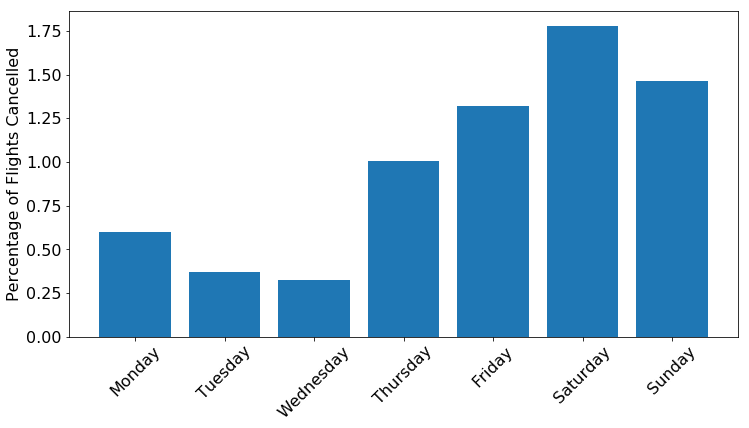

In [5]:
import matplotlib.pyplot as plt

font = {'size'   : 16}
plt.rc('font', **font)

days_cancelled = cancelled['CANCELLED'].groupby(df['DAY_OF_WEEK']).count()
days_total = df['CANCELLED'].groupby(df['DAY_OF_WEEK']).count()
days_frac = np.divide(days_cancelled, days_total)
x=days_frac.index.values
week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

fig, ax = plt.subplots(figsize = (12,6))
ax.bar(x,days_frac*100, align='center')
ax.set_ylabel('Percentage of Flights Cancelled')
ax.set_xticks(x)
ax.set_xticklabels(week, rotation = 45)

This shows that Monday has the lowest percentage of cancelled flights, and Tuesday has the highest, double that of Monday's percentage.

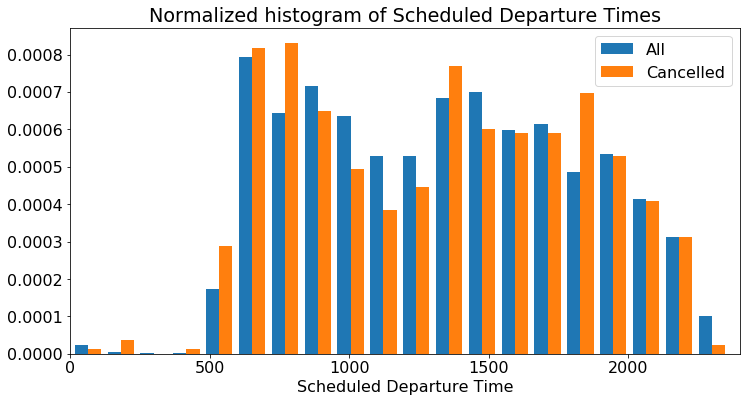

In [6]:
df['CRS_DEP_TIME'].head(10)
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (12,6))

ax.hist([df['CRS_DEP_TIME'], cancelled['CRS_DEP_TIME']], normed=1, bins=20, label=['All', 'Cancelled'])

ax.set_xlim(0,2400)

ax.set_xlabel('Scheduled Departure Time')
ax.set_title('Normalized histogram of Scheduled Departure Times')

plt.legend()
plt.show()

This shows that early morning and late night flights are slightly more likely to be cancelled

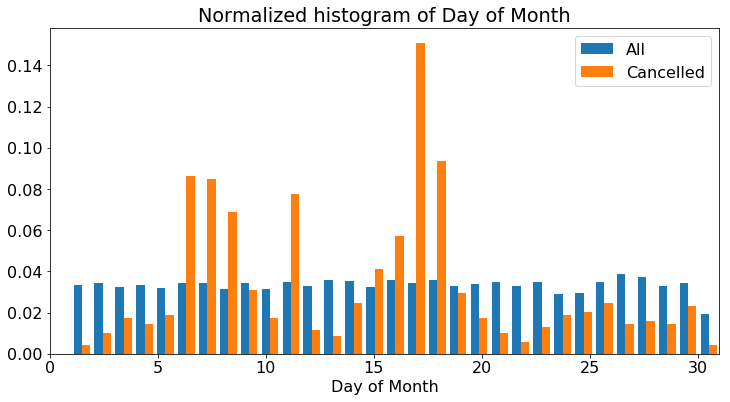

In [7]:
df['DAY_OF_MONTH'].head(10)
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (12,6))

ax.hist([df['DAY_OF_MONTH'], cancelled['DAY_OF_MONTH']], normed=1, bins=31, label=['All', 'Cancelled'])

ax.set_xlim(0,31)

ax.set_xlabel('Day of Month')
ax.set_title('Normalized histogram of Day of Month')

plt.legend()
plt.show()

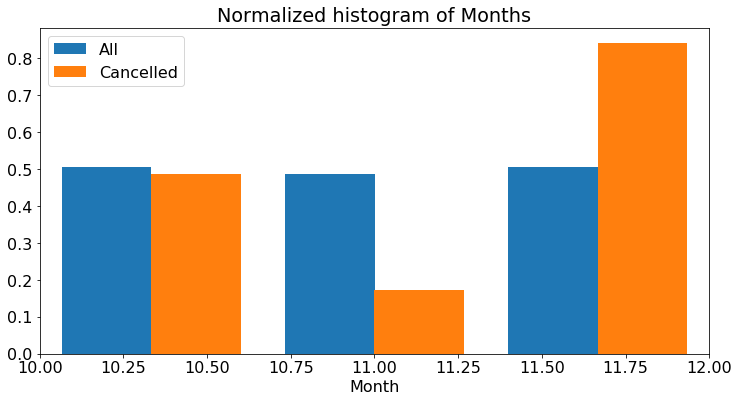

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (12,6))

ax.hist([df['MONTH'], cancelled['MONTH']], normed=1, bins=3, label=['All', 'Cancelled'])

ax.set_xlim(10,12)

ax.set_xlabel('Month')
ax.set_title('Normalized histogram of Months')

plt.legend()
plt.show()

We only have three months of data, so the structure here is most likely due to small number statistics

## 1.2 Distance Histogram

Here we create a normalized histogram of flight distances to compare the differences in the distribution of cancelled vs non-cancelled flights

This shows us that shorter distance flights are over-represented in the distribution of cancelled flights. In other words, short flights are more likely to be cancelled.

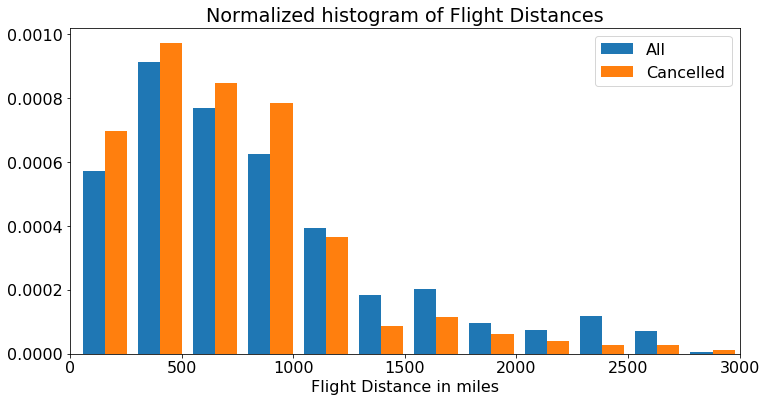

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (12,6))

ax.hist([df['DISTANCE'], cancelled['DISTANCE']], normed=1, bins=20, label=['All', 'Cancelled'])

ax.set_xlim(0,3000)
ax.set_xlabel('Flight Distance in miles')
ax.set_title('Normalized histogram of Flight Distances')

plt.legend()
plt.show()

## 1.3 Histogram of Taxi-Out times

We can see here that many flights are cancelled before the plane has a chance to taxi-out to the runway.

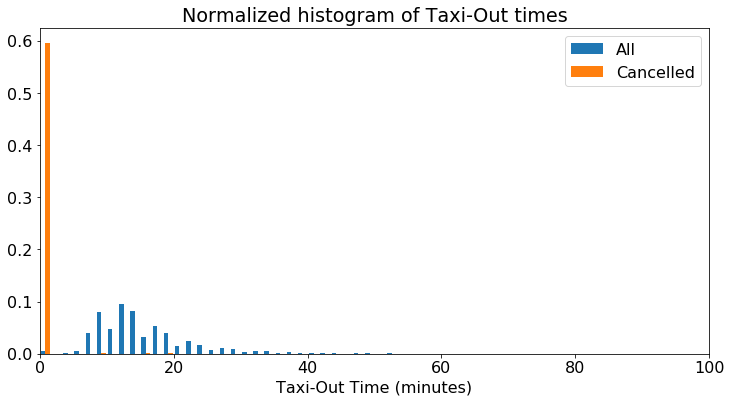

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (12,6))

ax.hist([df['TAXI_OUT'], cancelled['TAXI_OUT']], normed=1, bins=100, label=['All', 'Cancelled'])

ax.set_xlim(0,100)
ax.set_xlabel('Taxi-Out Time (minutes)')
ax.set_title('Normalized histogram of Taxi-Out times')

plt.legend()
plt.show()

Let's make the same plot, but exclude all flights with Taxi-Out times of zero. This shows us that flights that are cancelled after taxiing-out to the runway have longer taxi-out times on average.

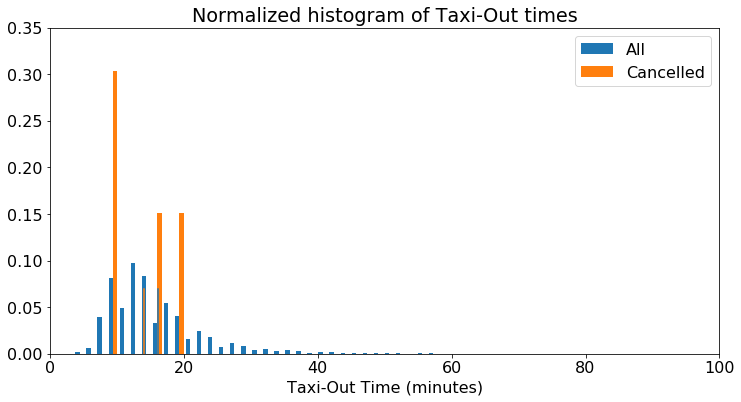

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (12,6))

x = df['TAXI_OUT'][df['TAXI_OUT' ] > 0]
y = cancelled['TAXI_OUT'][cancelled['TAXI_OUT' ] > 0]

x_mean = np.mean(x)
y_mean = np.mean(y)

ax.hist([x, y], normed=1, bins=100, label=['All', 'Cancelled'])
ax.plot([x_mean, x_mean],[-0.01,0.07],color='#1f77b4')
ax.plot([y_mean, y_mean],[-0.01,0.07],color='#ff7f0e')

ax.set_xlim(0,100)
ax.set_xlabel('Taxi-Out Time (minutes)')
ax.set_title('Normalized histogram of Taxi-Out times')
plt.ylim(0.00,.35)

plt.legend()
plt.show()

## 1.4 Carrier Delay and reasons

Here we grouped by the carriers and added up all the delay time reasons to get an idea of average delay times and their reasons for all the different carriers

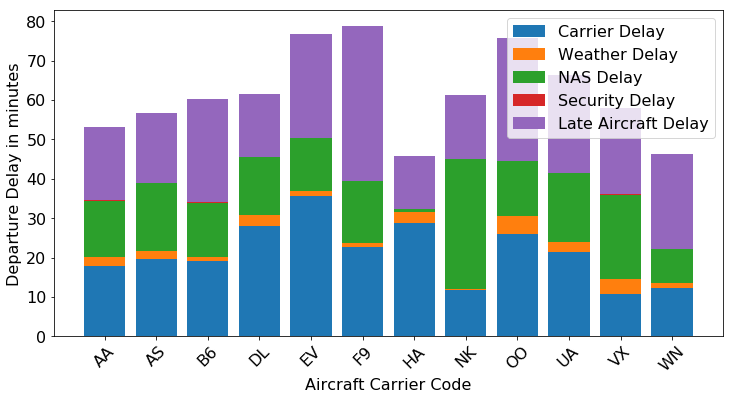

In [12]:
import matplotlib.pyplot as plt

df['total_delay'] = (df['CARRIER_DELAY'] + df['WEATHER_DELAY']
             + df['NAS_DELAY'] + df['SECURITY_DELAY'] + df['LATE_AIRCRAFT_DELAY'])

df_delayed = df[~np.isnan(df['total_delay'])]
df['total_delay'].fillna(0, inplace=True)
df_delayed.head()

carrier_group = df_delayed['CARRIER_DELAY'].groupby(df_delayed['UNIQUE_CARRIER']).mean()
weather_group = df_delayed['WEATHER_DELAY'].groupby(df_delayed['UNIQUE_CARRIER']).mean()
nas_group = df_delayed['NAS_DELAY'].groupby(df_delayed['UNIQUE_CARRIER']).mean()
security_group = df_delayed['SECURITY_DELAY'].groupby(df_delayed['UNIQUE_CARRIER']).mean()
late_group = df_delayed['LATE_AIRCRAFT_DELAY'].groupby(df_delayed['UNIQUE_CARRIER']).mean()

w_bottom = carrier_group.values
n_bottom = w_bottom + weather_group.values
s_bottom = n_bottom + nas_group.values
l_bottom = s_bottom + security_group.values

x = carrier_group.index.values

fig, ax = plt.subplots(figsize = (12,6))

ax.set_xticks(np.arange(len(x)))
ax.set_xticklabels(x, rotation = 45)
ax.bar(np.arange(len(x)),carrier_group.values, align='center', label='Carrier Delay')
ax.bar(np.arange(len(x)),weather_group.values, align='center', bottom=w_bottom, label='Weather Delay')
ax.bar(np.arange(len(x)),nas_group.values, align='center', bottom=n_bottom, label='NAS Delay')
ax.bar(np.arange(len(x)),security_group.values, align='center', bottom=s_bottom, label='Security Delay')
ax.bar(np.arange(len(x)),late_group.values, align='center', bottom=l_bottom, label='Late Aircraft Delay')

ax.set_xlabel('Aircraft Carrier Code')
ax.set_ylabel('Departure Delay in minutes')

plt.legend()
plt.show()

## 1.5 Carrier Cancellations and reasons

Here we grouped by carrier and cancellation code to see how many cancellations each carrier had and the distributions of the reasons for cancellation. We also plot below the total flights from each carrier for normalization purposes.

We can see that Hawaiian Airlines had very few cancellation (but also relatively few flights) but also that none of them were due to weather, whichs makes sense because Hawaii usually has good weather.

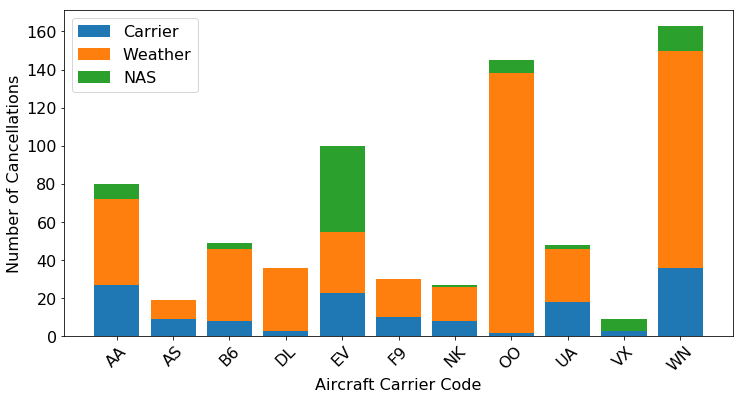

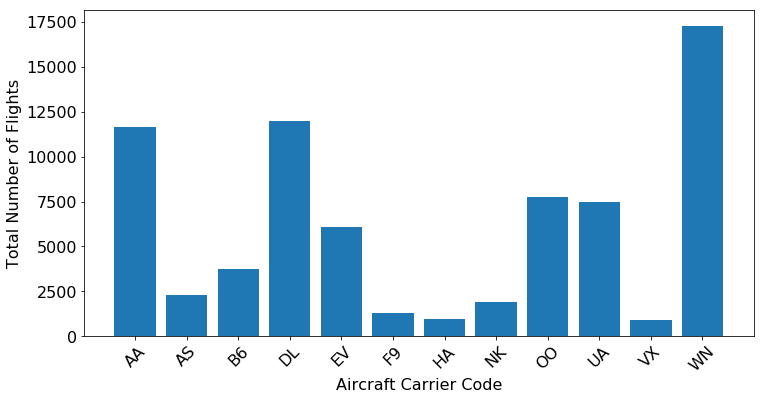

In [13]:
import matplotlib.pyplot as plt

cancelled_group = cancelled.groupby(['UNIQUE_CARRIER','CANCELLATION_CODE']).size().reindex(fill_value=0.0).unstack()
cg = cancelled_group.fillna(0)

b_bottom = cg.loc[:,'A'].values
c_bottom = b_bottom + cg.loc[:,'B'].values
d_bottom = c_bottom + cg.loc[:,'B'].values

x = cg.loc[:,'A'].index.values

fig, ax = plt.subplots(figsize = (12,6))

ax.set_xticks(np.arange(len(x)))
ax.set_xticklabels(x, rotation = 45)
ax.bar(np.arange(len(x)),cg.loc[:,'A'].values, align='center', label='Carrier')
ax.bar(np.arange(len(x)),cg.loc[:,'B'].values, align='center', bottom=b_bottom, label='Weather')
ax.bar(np.arange(len(x)),cg.loc[:,'C'].values, align='center', bottom=c_bottom, label='NAS')
#ax.bar(np.arange(len(x)),cancelled_group.loc[:,'D'].values, align='center', bottom=d_bottom, label='Security')

ax.set_xlabel('Aircraft Carrier Code')
ax.set_ylabel('Number of Cancellations')

plt.legend()
plt.show()

total_flights_per_carrier = df['UNIQUE_CARRIER'].groupby(df['UNIQUE_CARRIER']).count()

fig, ax1 = plt.subplots(figsize = (12,6))

x = total_flights_per_carrier.index.values

ax1.set_xticks(np.arange(len(x)))
ax1.set_xticklabels(x, rotation = 45)
ax1.bar(np.arange(len(x)),total_flights_per_carrier.values, align='center')

ax1.set_xlabel('Aircraft Carrier Code')
ax1.set_ylabel('Total Number of Flights')

plt.show()

Here we show a summary table for the carriers showing several totals and averages

The point of this table is just to help us get a better sense of our data

In [14]:
carrier_flights = df['UNIQUE_CARRIER'].groupby(df['UNIQUE_CARRIER']).count()
carrier_cancelled = df['CANCELLED'].groupby(df['UNIQUE_CARRIER']).sum()
carrier_delayed = df_delayed['UNIQUE_CARRIER'].groupby(df_delayed['UNIQUE_CARRIER']).count()
carrier_diverted = df['DIVERTED'].groupby(df['UNIQUE_CARRIER']).sum()
carrier_avg_time = df['AIR_TIME'].groupby(df['UNIQUE_CARRIER']).mean()
carrier_avg_dist = df['DISTANCE'].groupby(df['UNIQUE_CARRIER']).mean()
carrier_avg_delay = df['total_delay'].groupby(df['UNIQUE_CARRIER']).mean()
carrier_avg_taxiIn = df['TAXI_IN'].groupby(df['UNIQUE_CARRIER']).mean()
carrier_avg_taxiOut = df['TAXI_OUT'].groupby(df['UNIQUE_CARRIER']).mean()
carrier_pct_cancelled = 100*np.divide(carrier_cancelled, carrier_flights)

carrier_names = pd.Series(['American Airlines','Alaska Airlines','JetBlue Airways',
                          'Delta Airlines','Atlantic Southeast Airlines','Frontier Airlines',
                          'Hawaiian Airlines','Northwest Airlines','Skywest Airlines','United Airlines',
                          'Mesa Airlines','Southwest Airlines'], index=carrier_flights.index)
# carrier_names = pd.Series(['Pinnacle Airlines', 'American Airlines', 'Alaska Airlines', 'Jetblue Airways',
#                       'Cobaltair', 'Delta Air Lines', 'ExpressJet Airlines', 'Frontier Airlines', 'AirTran Airways',
#                       'Hawaiian Airlines', 'Envoy Air', 'Northwest Airlines', 'US Airways Express', 
#                       'SkyWest Airlines', 'United Airlines', 'US Airways', 'Southwest Airlines',
#                       'JetSuiteX Air', 'Mesa Airlines'], index=carrier_flights.index)

summary_table_carrier = pd.concat([carrier_names, carrier_flights, carrier_cancelled, carrier_pct_cancelled, 
                                   carrier_diverted, 
                           carrier_avg_time, carrier_avg_dist, carrier_avg_delay,
                          carrier_avg_taxiIn, carrier_avg_taxiOut], axis=1)

summary_table_carrier.columns = ['Carrier Name', 'Total Flights', 'Cancelled Flights', 'Percent Cancelled',
                         'Diverted Flights', 'Average Flight Time (minutes)',
                         'Average Flight Distance (miles)', 'Average Flight Delay (minutes)', 
                         'Average Taxi-In (minutes)', 'Average Taxi-Out (minutes)']



summary_table_carrier

,Carrier Name,Total Flights,Cancelled Flights,Percent Cancelled,Diverted Flights,Average Flight Time (minutes),Average Flight Distance (miles),Average Flight Delay (minutes),Average Taxi-In (minutes),Average Taxi-Out (minutes)
UNIQUE_CARRIER,,,,,,,,,,
AA,American Airlines,11616,80.0,0.688705,12.0,136.172336,1010.818698,8.658230,9.008495,18.235795
AS,Alaska Airlines,2283,19.0,0.832238,3.0,161.974348,1223.318003,8.751205,6.923485,15.999562
B6,JetBlue Airways,3735,49.0,1.311914,5.0,144.424613,1062.123159,12.785007,6.539213,16.326104
DL,Delta Airlines,11969,36.0,0.300777,9.0,115.091412,841.818949,6.750021,6.980223,17.047122
EV,Atlantic Southeast Airlines,6066,100.0,1.648533,18.0,70.615165,445.730135,13.417738,7.352783,17.051764
F9,Frontier Airlines,1318,30.0,2.276176,1.0,143.644911,1093.203338,16.925645,11.802795,15.327011
HA,Hawaiian Airlines,977,0.0,0.000000,2.0,76.090256,559.678608,4.772774,6.810645,11.167861
NK,Northwest Airlines,1890,27.0,1.428571,0.0,134.245303,989.220635,11.712169,8.666130,14.667725
OO,Skywest Airlines,7770,145.0,1.866152,31.0,76.253490,496.900515,13.378250,7.012735,19.494466


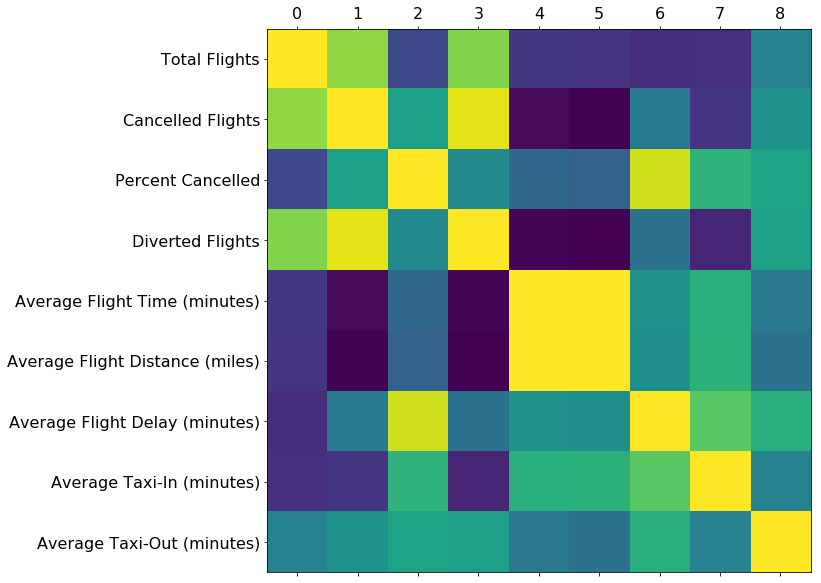

In [15]:
#plt.matshow(summary_table_carrier.corr())
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    #plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
    
plot_corr(summary_table_carrier)

plt.show()

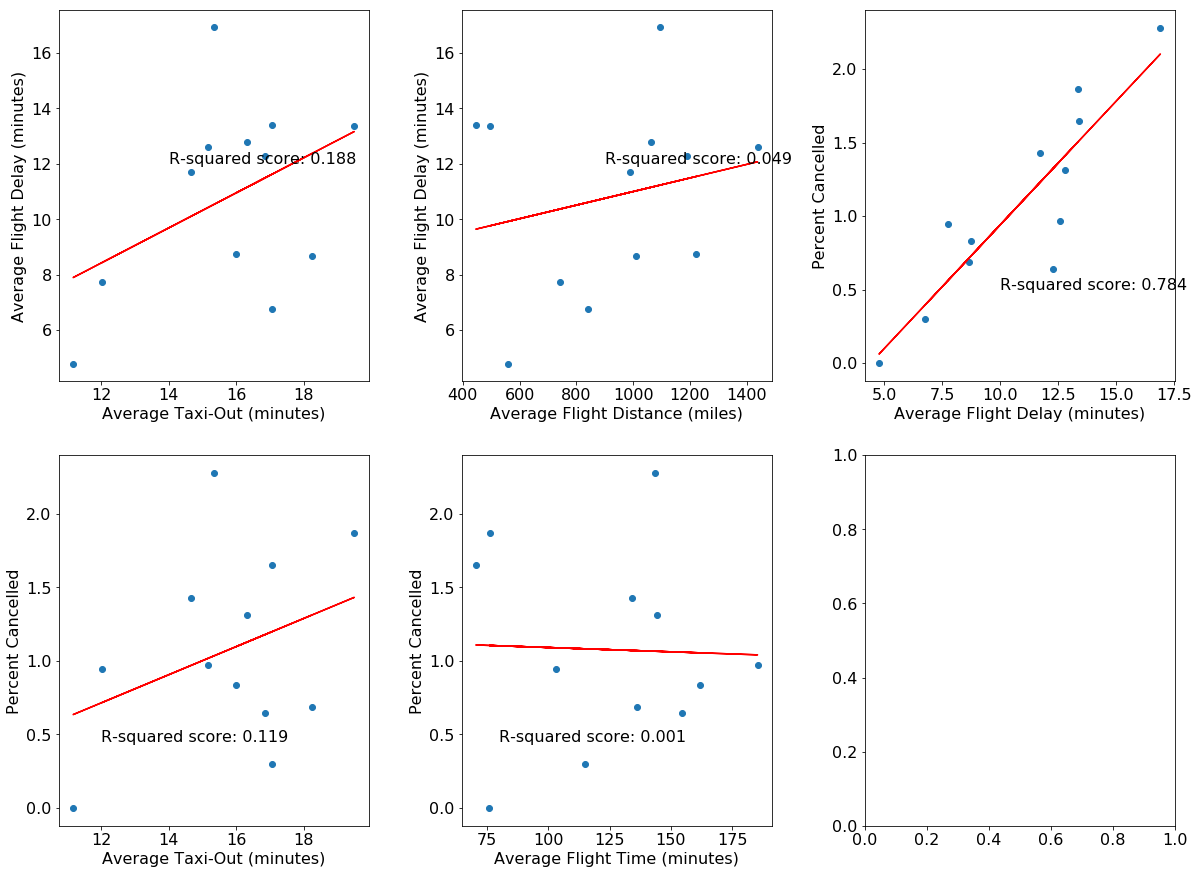

In [16]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(20, 15))


ax1.scatter(carrier_avg_taxiOut, carrier_avg_delay)
X = carrier_avg_taxiOut.values.reshape(-1,1)
linreg = LinearRegression().fit(X, carrier_avg_delay)
ax1.plot(carrier_avg_taxiOut, linreg.coef_ * carrier_avg_taxiOut + linreg.intercept_, 'r-')
ax1.text(14,12,'R-squared score: {:.3f}'
     .format(linreg.score(X, carrier_avg_delay)))
ax1.set_xlabel('Average Taxi-Out (minutes)')
ax1.set_ylabel('Average Flight Delay (minutes)')

####################################################################################

ax2.scatter(carrier_avg_dist, carrier_avg_delay)
X = carrier_avg_dist.values.reshape(-1,1)
linreg = LinearRegression().fit(X, carrier_avg_delay)
ax2.plot(carrier_avg_dist, linreg.coef_ * carrier_avg_dist + linreg.intercept_, 'r-')
ax2.text(900,12,'R-squared score: {:.3f}'
     .format(linreg.score(X, carrier_avg_delay)))
ax2.set_xlabel('Average Flight Distance (miles)')
ax2.set_ylabel('Average Flight Delay (minutes)')

####################################################################################

X = summary_table_carrier['Average Flight Delay (minutes)']
y = summary_table_carrier['Percent Cancelled']
ax3.scatter(X, y)

X = X.values.reshape(-1,1)

linreg = LinearRegression().fit(X, y)
ax3.plot(X, linreg.coef_ * X + linreg.intercept_, 'r-')
ax3.text(10,0.5,'R-squared score: {:.3f}'
     .format(linreg.score(X, y)))
ax3.set_xlabel('Average Flight Delay (minutes)')
ax3.set_ylabel('Percent Cancelled')

####################################################################################

X = summary_table_carrier['Average Taxi-Out (minutes)']
y = summary_table_carrier['Percent Cancelled']
ax4.scatter(X, y)

X = X.values.reshape(-1,1)

linreg = LinearRegression().fit(X, y)
ax4.plot(X, linreg.coef_ * X + linreg.intercept_, 'r-')
ax4.text(12,0.45,'R-squared score: {:.3f}'
     .format(linreg.score(X, y)))
ax4.set_xlabel('Average Taxi-Out (minutes)')
ax4.set_ylabel('Percent Cancelled')

####################################################################################

X = summary_table_carrier['Average Flight Time (minutes)']
y = summary_table_carrier['Percent Cancelled']
ax5.scatter(X, y)

X = X.values.reshape(-1,1)

linreg = LinearRegression().fit(X, y)
ax5.plot(X, linreg.coef_ * X + linreg.intercept_, 'r-')
ax5.text(80,0.45,'R-squared score: {:.3f}'
     .format(linreg.score(X, y)))
ax5.set_xlabel('Average Flight Time (minutes)')
ax5.set_ylabel('Percent Cancelled')

fig.subplots_adjust(hspace=0.2, wspace=0.3)

plt.show()

This shows that the average flight delay is positively correlated with the average taxi-out time, and that the percent of flights cancelled is negatively correlated with average flight times, when averages are calculated across carriers. None of these correlations are particularly strong, however.

Now lets group by Origin city, of which there are many more than unique carries, so we may be able to see more intricate aspects of the data.

In [17]:
origin_flights = df['ORIGIN'].groupby(df['ORIGIN']).count()
origin_cancelled = df['CANCELLED'].groupby(df['ORIGIN']).sum()
origin_delayed = df_delayed['UNIQUE_CARRIER'].groupby(df_delayed['ORIGIN']).count()
origin_diverted = df['DIVERTED'].groupby(df['ORIGIN']).sum()
origin_avg_time = df['AIR_TIME'].groupby(df['ORIGIN']).mean()
origin_avg_dist = df['DISTANCE'].groupby(df['ORIGIN']).mean()
origin_avg_delay = df['total_delay'].groupby(df['ORIGIN']).mean()
#origin_avg_taxiIn = df['TaxiIn'].groupby(df['Origin']).mean()
origin_avg_taxiOut = df['TAXI_OUT'].groupby(df['ORIGIN']).mean()
origin_pct_cancelled = 100*np.divide(origin_cancelled, origin_flights)

summary_table_origin = pd.concat([origin_flights, origin_cancelled, origin_pct_cancelled, origin_diverted, 
                           origin_avg_time, origin_avg_dist, origin_avg_delay,
                           origin_avg_taxiOut], axis=1)

summary_table_origin.columns = ['Total Flights', 'Cancelled Flights', 'Percent Cancelled',
                         'Diverted Flights', 'Average Flight Time (minutes)',
                         'Average Flight Distance (miles)', 'Average Flight Delay (minutes)', 
                         'Average Taxi-Out (minutes)']

summary_table_origin = summary_table_origin.sort_values('Total Flights', ascending=False)
summary_table_origin.head(15)

,Total Flights,Cancelled Flights,Percent Cancelled,Diverted Flights,Average Flight Time (minutes),Average Flight Distance (miles),Average Flight Delay (minutes),Average Taxi-Out (minutes)
ORIGIN,,,,,,,,
ATL,5058,28.0,0.553578,10.0,93.059363,642.704429,6.676354,15.931594
ORD,3160,61.0,1.930380,7.0,117.453752,838.881646,12.831646,19.162975
DEN,2902,32.0,1.102688,8.0,115.401118,887.292212,10.438318,15.603722
LAX,2837,20.0,0.704970,3.0,157.310590,1285.760310,14.122312,18.088826
DFW,2462,22.0,0.893582,5.0,117.914168,878.641348,11.328188,17.976442
SFO,2299,36.0,1.565898,4.0,146.861000,1202.970422,12.630274,18.549804
PHX,2173,12.0,0.552232,6.0,119.686311,945.456512,8.810861,15.820985
LAS,1945,9.0,0.462725,0.0,124.584194,997.100771,10.015424,14.437018
IAH,1820,10.0,0.549451,6.0,113.142461,838.389011,9.645604,16.303846


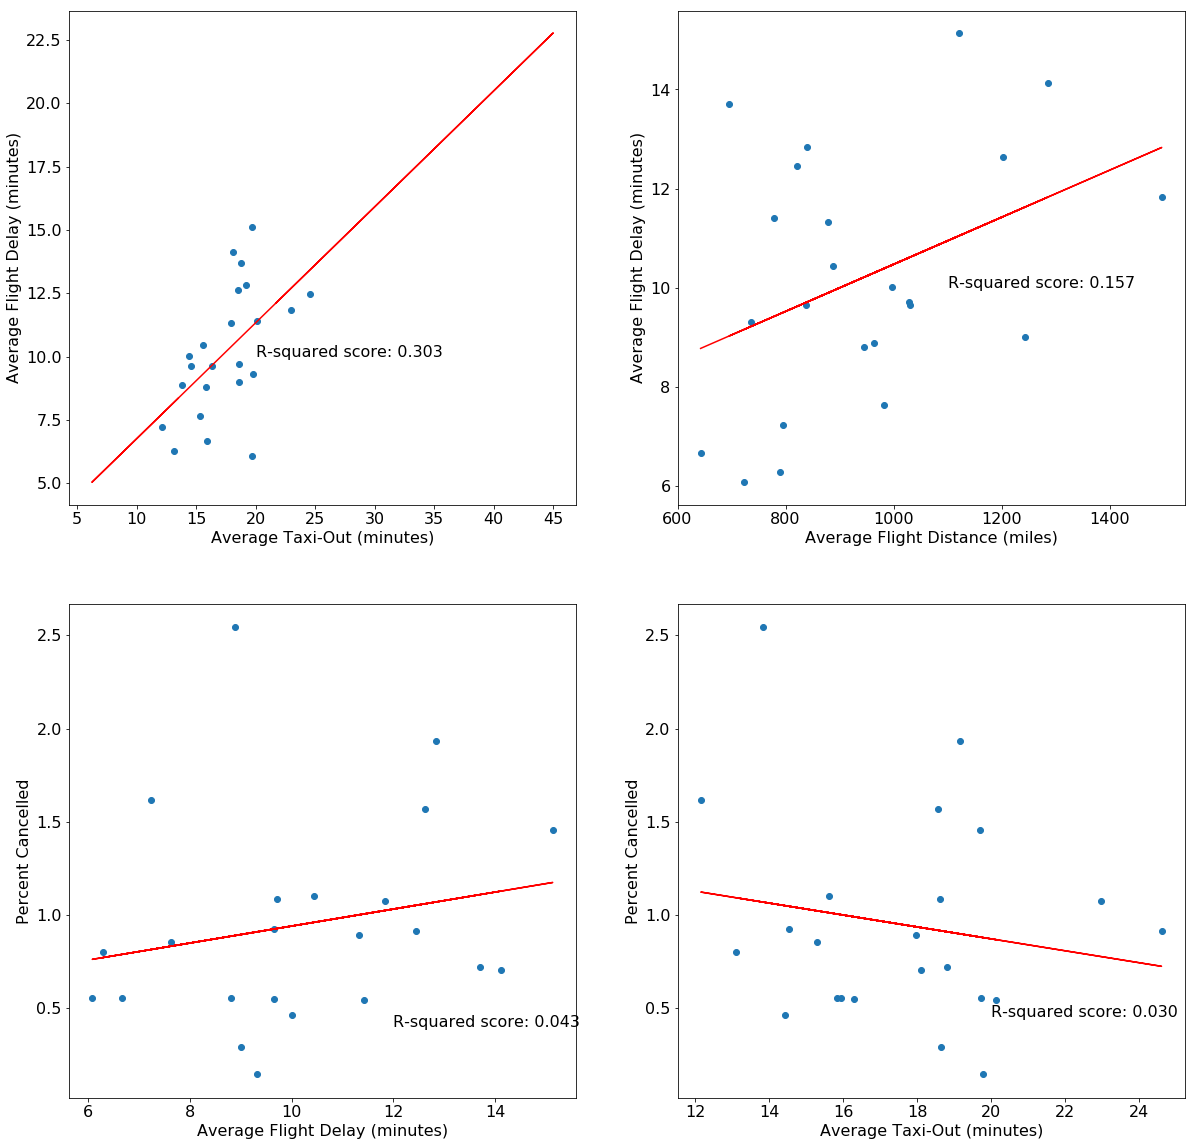

In [18]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df1 = summary_table_origin[summary_table_origin['Total Flights']>1000]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 20))

X = df1['Average Taxi-Out (minutes)']
y = df1['Average Flight Delay (minutes)']
ax1.scatter(X, y)

X = X.values.reshape(-1,1)
y = y.values.reshape(1,-1)

from sklearn.preprocessing import Imputer
y_imputer = Imputer(axis=1)

y_imputed = y_imputer.fit_transform(y)
y_imputed = y_imputed[0]

linreg = LinearRegression().fit(X, y_imputed)
ax1.plot(origin_avg_taxiOut, linreg.coef_ * origin_avg_taxiOut + linreg.intercept_, 'r-')
ax1.text(20,10,'R-squared score: {:.3f}'
     .format(linreg.score(X, y_imputed)))
ax1.set_xlabel('Average Taxi-Out (minutes)')
ax1.set_ylabel('Average Flight Delay (minutes)')

####################################################################################

X = df1['Average Flight Distance (miles)']
y = df1['Average Flight Delay (minutes)']
ax2.scatter(X, y)

X = X.values.reshape(-1,1)
y = y.values.reshape(1,-1)

linreg = LinearRegression().fit(X, y_imputed)
ax2.plot(X, linreg.coef_ * X + linreg.intercept_, 'r-')
ax2.text(1100,10,'R-squared score: {:.3f}'
     .format(linreg.score(X, y_imputed)))
ax2.set_xlabel('Average Flight Distance (miles)')
ax2.set_ylabel('Average Flight Delay (minutes)')

####################################################################################

X = df1['Average Flight Delay (minutes)']
y = df1['Percent Cancelled']
ax3.scatter(X, y)

X = X.values.reshape(-1,1)

linreg = LinearRegression().fit(X, y)
ax3.plot(X, linreg.coef_ * X + linreg.intercept_, 'r-')
ax3.text(12,0.4,'R-squared score: {:.3f}'
     .format(linreg.score(X, y)))
ax3.set_xlabel('Average Flight Delay (minutes)')
ax3.set_ylabel('Percent Cancelled')

####################################################################################

X = df1['Average Taxi-Out (minutes)']
y = df1['Percent Cancelled']
ax4.scatter(X, y)

X = X.values.reshape(-1,1)

linreg = LinearRegression().fit(X, y)
ax4.plot(X, linreg.coef_ * X + linreg.intercept_, 'r-')
ax4.text(20,0.45,'R-squared score: {:.3f}'
     .format(linreg.score(X, y)))
ax4.set_xlabel('Average Taxi-Out (minutes)')
ax4.set_ylabel('Percent Cancelled')

plt.show()

Now we can do the same thing but grouping by destination instead of origin to see if we can  find anything interesting.

In [19]:
dest_flights = df['DEST'].groupby(df['DEST']).count()
dest_cancelled = df['CANCELLED'].groupby(df['DEST']).sum()
dest_delayed = df_delayed['UNIQUE_CARRIER'].groupby(df_delayed['DEST']).count()
dest_diverted = df['DIVERTED'].groupby(df['DEST']).sum()
dest_avg_time = df['AIR_TIME'].groupby(df['DEST']).mean()
dest_avg_dist = df['DISTANCE'].groupby(df['DEST']).mean()
dest_avg_delay = df['total_delay'].groupby(df['DEST']).mean()
dest_avg_taxiIn = df['TAXI_IN'].groupby(df['DEST']).mean()
#dest_avg_taxiOut = df['TaxiOut'].groupby(df['Dest']).mean()
dest_pct_cancelled = 100*np.divide(dest_cancelled, dest_flights)

summary_table_dest = pd.concat([dest_flights, dest_cancelled, dest_pct_cancelled, dest_diverted, 
                           dest_avg_time, dest_avg_dist, dest_avg_delay,
                           dest_avg_taxiIn], axis=1)

summary_table_dest.columns = ['Total Flights', 'Cancelled Flights', 'Percent Cancelled',
                         'Diverted Flights', 'Average Flight Time (minutes)',
                         'Average Flight Distance (miles)', 'Average Flight Delay (minutes)', 
                         'Average Taxi-In (minutes)']

summary_table_dest = summary_table_dest.sort_values('Total Flights', ascending=False)
summary_table_dest.head(15)

,Total Flights,Cancelled Flights,Percent Cancelled,Diverted Flights,Average Flight Time (minutes),Average Flight Distance (miles),Average Flight Delay (minutes),Average Taxi-In (minutes)
DEST,,,,,,,,
ATL,5016,25.0,0.498405,0.0,88.371669,632.455742,7.371013,8.254258
ORD,3148,45.0,1.429479,3.0,115.244839,829.997776,11.357370,12.452465
DEN,2895,42.0,1.450777,1.0,124.151122,892.735751,9.698446,9.472485
LAX,2787,14.0,0.502332,1.0,178.997475,1308.498027,15.512020,14.486837
DFW,2571,6.0,0.233372,2.0,120.031604,862.287048,8.720342,11.255361
SFO,2247,41.0,1.824655,11.0,167.940319,1194.719181,18.922563,7.892971
PHX,2080,15.0,0.721154,6.0,136.771734,966.652404,10.696154,7.677482
LAS,1935,17.0,0.878553,2.0,139.998434,993.831525,8.778811,7.329510
IAH,1832,10.0,0.545852,2.0,118.002747,846.846616,9.865721,8.457739


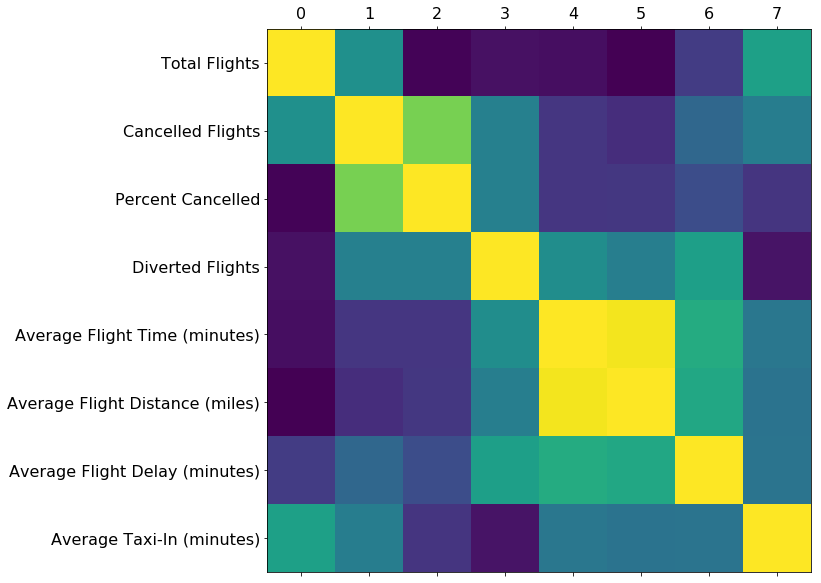

In [20]:
df2 = summary_table_dest[summary_table_dest['Total Flights']>1000]

plot_corr(df2)

plt.show()

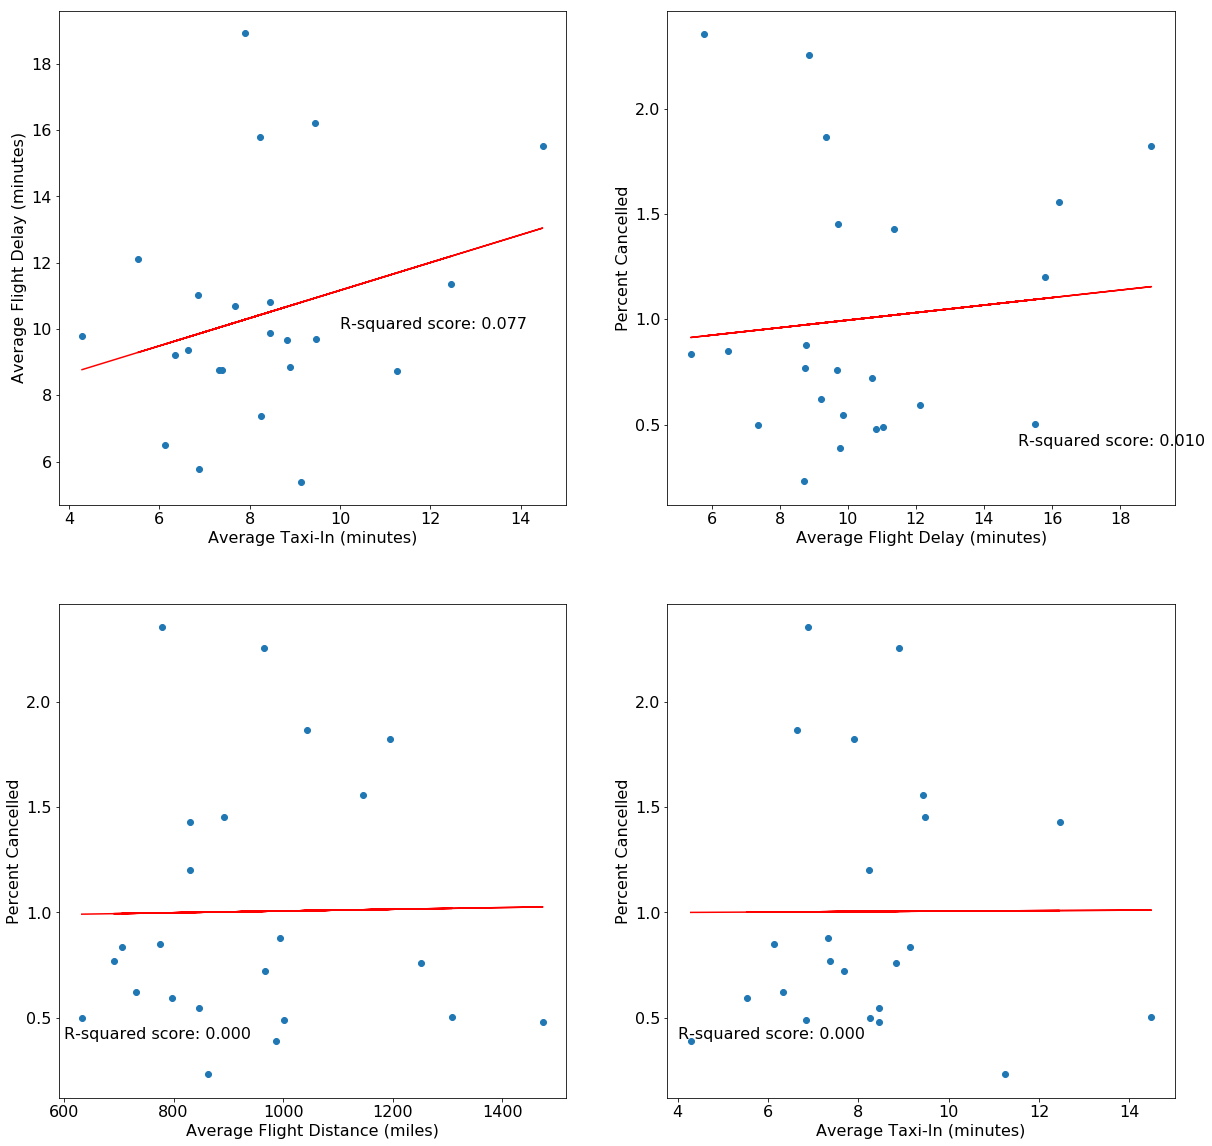

In [21]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#df2 = summary_table_dest[summary_table_dest['Cancelled Flights']>1]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 20))

X = df2['Average Taxi-In (minutes)']
y = df2['Average Flight Delay (minutes)']
ax1.scatter(X, y)

X = X.values.reshape(-1,1)

linreg = LinearRegression().fit(X, y)
ax1.plot(X, linreg.coef_ * X + linreg.intercept_, 'r-')
ax1.text(10,10,'R-squared score: {:.3f}'
     .format(linreg.score(X, y)))
ax1.set_xlabel('Average Taxi-In (minutes)')
ax1.set_ylabel('Average Flight Delay (minutes)')

####################################################################################

X = df2['Average Flight Delay (minutes)']
y = df2['Percent Cancelled']
ax2.scatter(X, y)

X = X.values.reshape(-1,1)

linreg = LinearRegression().fit(X, y)
ax2.plot(X, linreg.coef_ * X + linreg.intercept_, 'r-')
ax2.text(15,0.4,'R-squared score: {:.3f}'
     .format(linreg.score(X, y)))
ax2.set_xlabel('Average Flight Delay (minutes)')
ax2.set_ylabel('Percent Cancelled')

####################################################################################

X = df2['Average Flight Distance (miles)']
y = df2['Percent Cancelled']
ax3.scatter(X, y)

X = X.values.reshape(-1,1)

linreg = LinearRegression().fit(X, y)
ax3.plot(X, linreg.coef_ * X + linreg.intercept_, 'r-')
ax3.text(600,0.4,'R-squared score: {:.3f}'
     .format(linreg.score(X, y)))
ax3.set_xlabel('Average Flight Distance (miles)')
ax3.set_ylabel('Percent Cancelled')

####################################################################################

X = df2['Average Taxi-In (minutes)']
y = df2['Percent Cancelled']
ax4.scatter(X, y)

X = X.values.reshape(-1,1)

linreg = LinearRegression().fit(X, y)
ax4.plot(X, linreg.coef_ * X + linreg.intercept_, 'r-')
ax4.text(4,0.4,'R-squared score: {:.3f}'
     .format(linreg.score(X, y)))
ax4.set_xlabel('Average Taxi-In (minutes)')
ax4.set_ylabel('Percent Cancelled')

plt.show()


This shows that average flight delays and taxi times are more correlated with cancellations when grouped by carriers rather than origin or destination airports

# III. Machine learning:

Since carrier mean delay seemed to be correlated to cancellations when grouped by carrier, we add the average carrier delay as a column to the main dataset, and we will use this as a feature rather than the carrier column

In [22]:
df['Carrier mean delay'] = df['total_delay'].groupby(df['UNIQUE_CARRIER']).transform('mean')
df['Carrier mean distance'] = df['DISTANCE'].groupby(df['UNIQUE_CARRIER']).transform('mean')
df['Carrier cancellations'] = df['CANCELLED'].groupby(df['UNIQUE_CARRIER']).transform('mean')
df['Origin cancellations'] = df['CANCELLED'].groupby(df['ORIGIN']).transform('mean')
df['Dest cancellations'] = df['CANCELLED'].groupby(df['DEST']).transform('mean')

df['Origin TaxiOut'] = df['TAXI_OUT'].groupby(df['ORIGIN']).transform('mean')
df['Origin Delay'] = df['total_delay'].groupby(df['ORIGIN']).transform('mean')

df['ORIGIN'] = df['ORIGIN'].astype('category').cat.codes
df['DEST'] = df['DEST'].astype('category').cat.codes
df['CANCELLATION_CODE'] = df['CANCELLATION_CODE'].astype('category').cat.codes
df.fillna(0, inplace=True)

#print(len(df))

# X = df[['Month', 'DayofMonth', 'DayOfWeek', 'CRSDepTime', 'Origin', 'Dest', 'Distance', 'Carrier mean distance',
#         'total_delay', 'TaxiOut']]
# X = df[['Month', 'DayofMonth', 'DayOfWeek', 'CRSDepTime', 'Origin', 'Dest', 'Distance', 'Carrier mean distance',
#        'Carrier cancellations', 'Origin cancellations', 'Dest cancellations']]
# X = df[['Month', 'DayofMonth', 'DayOfWeek', 'CRSDepTime']]
X = df[['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'CRS_DEP_TIME', 'ORIGIN', 'DEST', 'DISTANCE', 'Carrier mean distance',
        'Origin Delay', 'Origin TaxiOut']]
y = df['CANCELLED']


# The code below was used for intermediate parameter searches as the full set was too big 
# and took too long to train each set of parameters

# df1 = df.sample(n=50000, random_state = 47)
# X = df1[['Month', 'DayofMonth', 'DayOfWeek', 'CRSDepTime', 'Origin', 'Dest', 'Distance', 'Carrier mean distance',
#         'Origin Delay', 'Origin TaxiOut']]
# y = df1['Cancelled']

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test)

## 1.1 Random Forest Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

clf = RandomForestClassifier(n_estimators=50, random_state=47).fit(X_train, y_train)

# sum(y_test)
# clf.score(X_test, y_test)

y_predicted = clf.predict(X_test)
confusion = confusion_matrix(y_test, y_predicted)
#confusion
#sum(y_predicted)

print('Recall: {:.3f}'.format(recall_score(y_test, y_predicted)))
print('Precision: {:.3f}'.format(precision_score(y_test, y_predicted)))
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, y_predicted)))
print('F1: {:.3f}'.format(f1_score(y_test, y_predicted)))
confusion = confusion_matrix(y_test, y_predicted)
print(confusion)
print('Feature importances: {}'.format(clf.feature_importances_))

Recall: 0.085
Precision: 0.714
Accuracy: 0.991
F1: 0.152
[[18144     6]
 [  161    15]]
Feature importances: [0.02636263 0.11820693 0.06798813 0.18946254 0.0827582  0.12794596
 0.15207569 0.06223388 0.08788772 0.08507832]


### 1.2 Gradient Boosting Tree.

In [25]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=300, learning_rate = 0.003, 
                                 max_depth = 2, random_state=37).fit(X_train, y_train)

y_predicted = clf.predict(X_test)
confusion = confusion_matrix(y_test, y_predicted)

print('Recall: {:.3f}'.format(recall_score(y_test, y_predicted)))
print('Precision: {:.3f}'.format(precision_score(y_test, y_predicted)))
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, y_predicted)))
print('F1: {:.3f}'.format(f1_score(y_test, y_predicted)))
confusion = confusion_matrix(y_test, y_predicted)
print(confusion)
print('Feature importances: {}'.format(clf.feature_importances_))

Recall: 0.000
Precision: 0.000
Accuracy: 0.990
F1: 0.000
[[18150     0]
 [  176     0]]
Feature importances: [0.19010639 0.29300455 0.39306603 0.00264783 0.         0.00124309
 0.         0.1127567  0.00076345 0.00641196]


With the given data, the decision tree algorithms were unable to correctly predict any cancelled flights

Now let's try a grid search in Support Vector classifiers.

In [26]:
# np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
# from sklearn.svm import SVC
# from sklearn.model_selection import GridSearchCV

# clf = SVC(kernel='rbf')
# #grid_values = {'gamma': [0.001, 0.01, 0.05, 0.1, 1, 10, 100], 'C': [0.01, 0.1, 1, 10, 100]}
# #grid_values = {'gamma': [0.1, 1, 10, 100], 'C': [100, 300, 1000, 3000]}
# grid_values = {'gamma': [3, 6, 10], 'C': [100, 300, 1000, 3000]}

# grid_clf = GridSearchCV(clf, param_grid = grid_values, scoring = 'recall')
# grid_clf.fit(X_train_scaled, y_train)
# grid_clf.cv_results_['mean_test_score'].reshape(4,3)

The grid search was first performed using samples of the full dataset with only 50,000 rows, then when I found the right set of parameters I did the grid search using the full dataset. This takes several hours on my macbook, so I've commented it out here, but the best parameters for the support classifier are gamma$\approx6$, C$\approx1000$

In [27]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

svm = SVC(kernel='rbf', C=1000, gamma=6, random_state=47).fit(X_train_scaled, y_train)
y_pred = svm.predict(X_test_scaled)

print('Recall: {:.3f}'.format(recall_score(y_test, y_pred)))
print('Precision: {:.3f}'.format(precision_score(y_test, y_pred)))
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred)))
print('F1: {:.3f}'.format(f1_score(y_test, y_pred)))
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

y_scores = svm.decision_function(X_test_scaled)
y_score_list = list(zip(y_test[0:20], y_scores[0:20]))

Recall: 0.142
Precision: 0.114
Accuracy: 0.981
F1: 0.126
[[17955   195]
 [  151    25]]


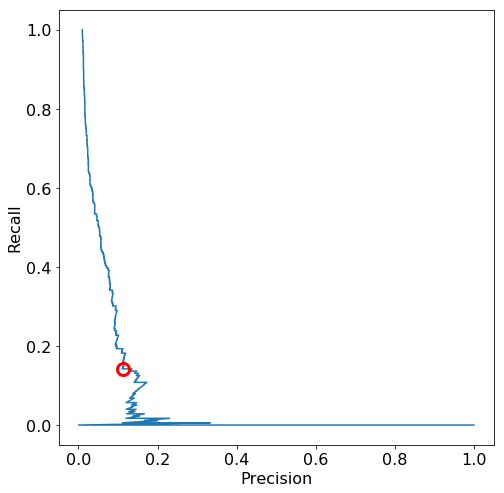

In [28]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

fig, ax1= plt.subplots(figsize=(8,8))
#plt.figure(figsize=(8,8))
ax1.plot(precision, recall, label='Precision-Recall Curve')
ax1.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
ax1.set_xlabel('Precision', fontsize=16)
ax1.set_ylabel('Recall', fontsize=16)
ax1.set_aspect('equal')
plt.show()

AUC: 0.775


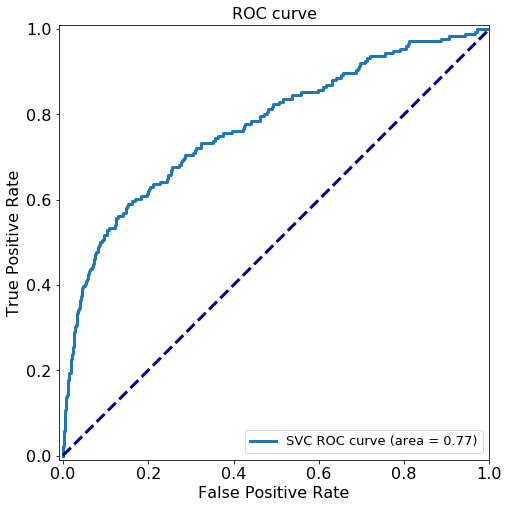

In [29]:
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
print('AUC: {:.3f}'.format(roc_auc))

fig, ax1= plt.subplots(figsize=(8,8))
#plt.figure(figsize=(8,8))
ax1.set_xlim([-0.01, 1.00])
ax1.set_ylim([-0.01, 1.01])
ax1.plot(fpr, tpr, lw=3, label='SVC ROC curve (area = {:0.2f})'.format(roc_auc))
ax1.set_xlabel('False Positive Rate', fontsize=16)
ax1.set_ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
ax1.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
ax1.set_aspect('equal')
plt.show()

### 1.3 Logistic regression and gridsearch

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

lr = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2'], 'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}
grid_lr = GridSearchCV(lr, param_grid = grid_values, scoring = 'recall').fit(X_train_scaled, y_train)
print(grid_lr.cv_results_['mean_test_score'].reshape(9,2))

[[0.000 0.000]
 [0.000 0.000]
 [0.000 0.000]
 [0.000 0.000]
 [0.000 0.000]
 [0.000 0.000]
 [0.000 0.000]
 [0.000 0.000]
 [0.000 0.000]]


### 1.4 Finally, let's try a neural network approach.

In [31]:
from sklearn.neural_network import MLPClassifier

nnclf = MLPClassifier(hidden_layer_sizes = [5,5], solver='adam', alpha=0.0003, activation='relu',
                     max_iter = 100, random_state = 47).fit(X_train_scaled, y_train)

y_predicted = nnclf.predict(X_test_scaled)
confusion = confusion_matrix(y_test, y_predicted)

print('Recall: {:.3f}'.format(recall_score(y_test, y_predicted)))
print('Precision: {:.3f}'.format(precision_score(y_test, y_predicted)))
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, y_predicted)))
print('F1: {:.3f}'.format(f1_score(y_test, y_predicted)))
confusion = confusion_matrix(y_test, y_predicted)
print(confusion)

Recall: 0.000
Precision: 0.000
Accuracy: 0.990
F1: 0.000
[[18150     0]
 [  176     0]]


# IV. Cancellation Classification summary:

Unsurprisingly, all of the machine learning algorithms presented here did a poor job predicting cancelled flights. Only the support vector classifier was able to correctly predict any cancelled flights, but only about 2% of them. If airlines do employ machine learning models to predict cancellations, they are most likely more sophisticated and include all sorts of data that we don't have access to here. Namely, current weather and aircraft/airport maintenance data. It makes sense that if you didn't need that current data to predict cancellations, there would be a lot fewer last-minute cancellations.


Now let's see how well we can predict the delay times of flights (regression):

In [32]:
df['Dest mean taxiIn'] = df['TAXI_IN'].groupby(df['DEST']).transform('mean')
df['Origin mean taxiOut'] = df['TAXI_IN'].groupby(df['DEST']).transform('mean')

X = df[['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'CRS_DEP_TIME', 'DISTANCE', 'Carrier mean distance',
       'Dest mean taxiIn', 'Origin mean taxiOut']]

y = df['total_delay']

In [33]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

Here we'll try to use polynomials of our features to fit a linear regression model that attempts to predict delay times.

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=5)
X_train_scaled_poly = poly.fit_transform(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test_scaled_poly = poly.transform(X_test_scaled)

linreg = Ridge(alpha=1.0).fit(X_train_scaled_poly, y_train)

print('(poly deg 5 + ridge) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train_scaled_poly, y_train)))
print('(poly deg 5 + ridge) R-squared score (test): {:.3f}'
     .format(linreg.score(X_test_scaled_poly, y_test)))

(poly deg 5 + ridge) R-squared score (training): 0.046
(poly deg 5 + ridge) R-squared score (test): 0.034


I found that a 5th degree polynomial of the features worked best, but not that great

In [35]:
from sklearn.neighbors import KNeighborsRegressor

knnreg = KNeighborsRegressor(n_neighbors = 31, algorithm='auto').fit(X_train_scaled, y_train)

print('R-squared test score: {:.3f}'
     .format(knnreg.score(X_test_scaled, y_test)))

R-squared test score: 0.025


In [36]:
from sklearn.neural_network import MLPRegressor

mlpreg = MLPRegressor(hidden_layer_sizes = [50,50,50],
                             activation = 'relu',
                             alpha = 0.0003,   #0.0003,
                             solver = 'lbfgs').fit(X_train_scaled, y_train)

print('R-squared test score: {:.3f}'
     .format(mlpreg.score(X_test_scaled, y_test)))

R-squared test score: 0.034


# Delay Time Regression Summary:

The features used for predicting delay times did not use data that could not be know days/weeks in advance of the flights. However, the argument could be made that the averaged features include __future__ data from the perspective of many of the flights. I don't think this introduces any significant concerns of __data leakage__, as there is no reason to expect these averages to be changing significantly with time. Furthermore, any __production ready__ models could be engineered to avoid this problem and only use averages of flights before the one being predicted.

Even so, the models did not do a great job predicting flight delay times. The KNN regressor did the best job with and R-squared score of 0.025, while both the linear regressor (with Ridge regularization and 5th degree polynomial features) and the neural network (with 3 hidden layers each of size 150) had R-squared scores of 0.034 and 0.043. Similarly to the cancellation prediction models, these could be augmented with real-time data about current weather and aircraft/airport maintenance data to give much more accurate results.